In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Tahap Awal**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Research Method/covid19_tweets.csv')

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
df['text'].head(10)

0    If I smelled the scent of hand sanitizers toda...
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 has give me...
4    25 July : Media Bulletin on Novel #CoronaVirus...
5    #coronavirus #covid19 deaths continue to rise....
6    How #COVID19 Will Change Work in General (and ...
7    You now have to wear face coverings when out s...
8    Praying for good health and recovery of @Chouh...
9    POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...
Name: text, dtype: object

In [ ]:
df_tweets = df['text'].sample(n=15_000, random_state=42).reset_index(drop=True)

In [ ]:
df_tweets

0        The latest The British Landlord Association Da...
1        #COVID19 has affected business owners and work...
2        July 24: #Thane city #COVID19 update\nNew case...
3        #COVID19\nGlobal overnight developments from 2...
4        Theatre can respond to the gendered impacts of...
                               ...                        
14995    Maybe it's time to just pack it in for footbal...
14996    .@jimdiodati Is there a reason @NiagaraFalls i...
14997    #COVID19 fallout: #Japan's economy shrinks at ...
14998       NYC is closed #COVID19 https://t.co/4nyCtgPEp3
14999    #poll duty free shopping comes to your doorste...
Name: text, Length: 15000, dtype: object

In [ ]:
print(len(df_tweets))

15000


In [ ]:
sentences = []

for i in range(len(df_tweets)):
  sentences.append(df_tweets[i])

## **Preprocessing**

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(text):
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)
  text = re.sub(r'@[^\s]+', '', text)
  text = re.sub(r'&[a-z]+;', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub('[0-9]+', '', text)
  tokens = word_tokenize(text)
  lowercase_tokens = [token.lower() for token in tokens]
  filtered_tokens = [token for token in lowercase_tokens if token not in stop_words]
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
  text = ' '.join(filtered_tokens)
  return text

In [ ]:
cleaned_sentences1 = df_tweets.apply(preprocess)

In [ ]:
print('========================================')
for i in range(10):
  print(str(i+1) + '|| ', end='')
  print(df_tweets[i])
  print('========================================')

1|| The latest The British Landlord Association Daily! https://t.co/k6NQz3vRmN Thanks to @vveksh @LaxMusgrave… https://t.co/iUbAcdV55t
2|| #COVID19 has affected business owners and workers across all industries, and you're not alone. The #MO Recovery Lab… https://t.co/knRFuSKUkw
3|| July 24: #Thane city #COVID19 update
New cases: 285, Discharged: 503 , Dead 4

Active cases: 6027 (35.16%)
Recovere… https://t.co/TicLUlg8lD
4|| #COVID19
Global overnight developments from 26th to 27th of July 2020
6 pm EAT: 16.285.278 Infections/Deaths 649.84… https://t.co/Kcx1fsIUyU
5|| Theatre can respond to the gendered impacts of #COVID19, and the growing violence women experience, by acting as a… https://t.co/SWKdqQCDcS
6|| How Hospitals are Using AI to Fight COVID-19.

What do you think, about this innovation?

#techsaturdays… https://t.co/pxpFQIYtnl
7|| We've updated our dedicated #coronavirus page that tackles lots of questions about your property, including info on… https://t.co/4RyDASrRs6
8|| Get

In [ ]:
print('========================================')
for i in range(10):
  print(str(i+1) + '|| ', end='')
  print(cleaned_sentences1[i])
  print('========================================')

1|| latest british landlord association daily thanks
2|| covid affected business owners workers across industries youre alone mo recovery lab
3|| july thane city covid update new cases discharged dead active cases recovere
4|| covid global overnight developments th th july pm eat infectionsdeaths
5|| theatre respond gendered impacts covid growing violence women experience acting
6|| hospitals using ai fight covid think innovation techsaturdays
7|| weve updated dedicated coronavirus page tackles lots questions property including info
8|| get well gilberto better times covid
9|| worldstage newsonline gov david umahi ebonyi state daughter three aides recovered c
10|| listen discuss wearing mask matter life death lets keep loved


In [ ]:
cleaned_sentences = list(set(cleaned_sentences1))

# print(len(cleaned_sentences1))
# print(len(cleaned_sentences))

diff = len(cleaned_sentences1) - len(cleaned_sentences)
print(f'{diff} data was deleted due to duplication')

533 data was deleted due to duplication


## **Text Embedding**

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_embeddings = vectorizer.fit_transform(cleaned_sentences)

In [ ]:
print(tfidf_embeddings[6])

  (0, 753)	0.23078435313109041
  (0, 23728)	0.27306326148626436
  (0, 6475)	0.3724948706959926
  (0, 6260)	0.27174112787477644
  (0, 7243)	0.2066936071591668
  (0, 14664)	0.6039421783223863
  (0, 14156)	0.3630281249460177
  (0, 6227)	0.2278360496688565
  (0, 2158)	0.261557414873064


### Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(words=sentence.lower().split(), tags=[i]) for i, sentence in enumerate(cleaned_sentences)]

model = Doc2Vec(tagged_data, vector_size=100, min_count=1, epochs=20)

doc2vec_embeddings = [model.infer_vector(sentence.lower().split()) for sentence in cleaned_sentences]

In [ ]:
print(len(doc2vec_embeddings))

14467


### Sentence-BERT

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.7 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=aa34a593db14fe516b1ced6d6abfcfc4b6cb1950f7a4a714372c2acef9cb5ab3
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
from sentence_transformers import SentenceTransformer

# Download the pre-trained model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Generate sentence embeddings
# sentences = ["This is sentence 1.", "This is sentence 2."]
sbert_embeddings = model.encode(cleaned_sentences)

In [ ]:
print(len(sbert_embeddings))

14467


## **Clustering**

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Methods

In [ ]:
def num_of_data_each_cluster(labels):
  # Hitung jumlah data dalam setiap klaster
  cluster_counts = np.bincount(labels+1)

  # Tampilkan jumlah data dalam setiap klaster
  for cluster_label, count in enumerate(cluster_counts):
    if cluster_label-1 != -1:
      print(f"Cluster {cluster_label-1}: {count} data")
    else:
      print(f"Outliers : {count} data")

In [ ]:
def params_tuning(X):
    # Menentukan range nilai untuk parameter yang akan dituning
    eps_range = [0.1, 0.25, 0.3, 0.5, 0.75, 0.8, 1.0]
    min_samples_range = [2, 6, 10]

    # Inisialisasi variabel untuk menyimpan parameter terbaik, skor terbaik, dan label terbaik
    best_params = None
    best_score = -1
    best_labels = None

    print("==============================")
    # Melakukan looping untuk mencoba setiap kombinasi nilai parameter
    for eps in eps_range:
        for min_samples in min_samples_range:
            # Membangun model DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)

            # Melakukan clustering pada data
            current_labels = dbscan.fit_predict(X)

            # Menghitung silhouette score
            if len(np.unique(current_labels)) == 1:
              score = -100
            else:
              score = silhouette_score(X, current_labels)

            # Menampilkan hasil
            print("Parameter: Epsilon =", eps, ", Min Samples =", min_samples)
            print("Clustering Result:", current_labels)
            if score != -100:
              print("Silhouette Score:", score)
            else:
              print("Silhouette Score: There is either no cluster or one cluster, so silhouette score can't be calculated")
            num_of_data_each_cluster(current_labels)
            print("==============================")

            # Memperbarui parameter terbaik jika ditemukan skor yang lebih baik
            if score > best_score:
              best_score = score
              best_params = (eps, min_samples)
              best_labels = current_labels

    # Menampilkan parameter terbaik, skor terbaik, dan label terbaik
    print("Best Parameters: Epsilon =", best_params[0], ", Min Samples =", best_params[1])
    print("Best Silhouette Score:", best_score)
    print("Best Clustering Labels:", best_labels)

    return best_params

In [ ]:
def clustering_dbscan(X, eps=0.3, min_samples=5):
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  labels = dbscan.fit_predict(X)

  print("==============================")
  print('Number of data in each cluster')
  print("==============================")
  num_of_data_each_cluster(labels)
  print("==============================")

  print('')

  print("=======================================")
  print('Evaluation')
  print("=======================================")
  if len(np.unique(labels)) == 1:
    print("There is either no cluster or one cluster, so silhouette score can't be calculated")
  else:
    silhouette_avg = silhouette_score(X, labels)
    print("Silhouette Score:", silhouette_avg)
  print("=======================================")

  return labels

In [ ]:
def display_bar_chart(labels):
  # Remove the clusters with labels -1 and 0
  cluster_labels = np.unique(labels)
  cluster_labels = cluster_labels[(cluster_labels != -1)]

  # Convert cluster labels to non-negative integers
  cluster_mapping = {label: i for i, label in enumerate(cluster_labels)}
  converted_labels = np.array([cluster_mapping[label] for label in labels if label not in [-1]])

  # Count the number of documents in each cluster
  cluster_counts = np.bincount(converted_labels)
  num_clusters = len(cluster_counts)

  # Plot the histogram
  plt.figure()
  plt.bar(range(num_clusters), cluster_counts)
  plt.xlabel("Cluster")
  plt.ylabel("Number of Documents")
  plt.title("Document Count per Cluster")
  plt.xticks(range(num_clusters), cluster_labels)
  plt.show()

### DBSCAN + TFIDF

In [ ]:
clustering_dbscan(tfidf_embeddings)

Number of data in each cluster
Outliers : 14467 data

Evaluation
There is either no cluster or one cluster, so silhouette score can't be calculated


array([-1, -1, -1, ..., -1, -1, -1])

Hyperparameter Tuning

In [ ]:
best_params_tfidf = params_tuning(tfidf_embeddings)

Parameter: Epsilon = 0.1 , Min Samples = 2
Clustering Result: [ 0 -1 -1 ... -1 -1 -1]
Silhouette Score: -0.28986637657011977
Outliers : 14454 data
Cluster 0: 3 data
Cluster 1: 2 data
Cluster 2: 2 data
Cluster 3: 2 data
Cluster 4: 2 data
Cluster 5: 2 data
Parameter: Epsilon = 0.1 , Min Samples = 6
Clustering Result: [-1 -1 -1 ... -1 -1 -1]
Silhouette Score: There is either no cluster or one cluster, so silhouette score can't be calculated
Outliers : 14467 data
Parameter: Epsilon = 0.1 , Min Samples = 10
Clustering Result: [-1 -1 -1 ... -1 -1 -1]
Silhouette Score: There is either no cluster or one cluster, so silhouette score can't be calculated
Outliers : 14467 data
Parameter: Epsilon = 0.25 , Min Samples = 2
Clustering Result: [ 0 -1 -1 ... -1 -1 -1]
Silhouette Score: -0.2892329756257298
Outliers : 14444 data
Cluster 0: 3 data
Cluster 1: 2 data
Cluster 2: 2 data
Cluster 3: 2 data
Cluster 4: 2 data
Cluster 5: 2 data
Cluster 6: 2 data
Cluster 7: 2 data
Cluster 8: 2 data
Cluster 9: 2 data

Clustering with Best Parameters

In [ ]:
labels_tfidf = clustering_dbscan(tfidf_embeddings, best_params_tfidf[0], best_params_tfidf[1])

Number of data in each cluster
Outliers : 3423 data
Cluster 0: 11044 data

Evaluation
Silhouette Score: 6.728141108792754e-05


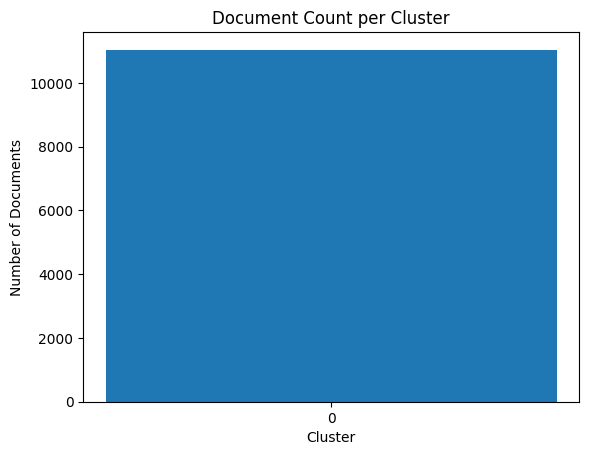

In [ ]:
display_bar_chart(labels_tfidf)

### DBSCAN + DOC2VEC

In [ ]:
clustering_dbscan(doc2vec_embeddings)

Number of data in each cluster
Outliers : 3261 data
Cluster 0: 11192 data
Cluster 1: 5 data
Cluster 2: 4 data
Cluster 3: 5 data

Evaluation
Silhouette Score: 0.021571754


array([ 0, -1,  0, ...,  0,  0,  0])

Hyperparameter Tuning

In [ ]:
best_params_doc2vec = params_tuning(doc2vec_embeddings)

Parameter: Epsilon = 0.1 , Min Samples = 2
Clustering Result: [ 0 -1 -1 ... -1 -1 -1]
Silhouette Score: -0.46506754
Outliers : 14165 data
Cluster 0: 2 data
Cluster 1: 196 data
Cluster 2: 2 data
Cluster 3: 2 data
Cluster 4: 3 data
Cluster 5: 2 data
Cluster 6: 2 data
Cluster 7: 2 data
Cluster 8: 3 data
Cluster 9: 2 data
Cluster 10: 2 data
Cluster 11: 2 data
Cluster 12: 3 data
Cluster 13: 2 data
Cluster 14: 3 data
Cluster 15: 2 data
Cluster 16: 4 data
Cluster 17: 2 data
Cluster 18: 3 data
Cluster 19: 2 data
Cluster 20: 3 data
Cluster 21: 2 data
Cluster 22: 2 data
Cluster 23: 2 data
Cluster 24: 2 data
Cluster 25: 3 data
Cluster 26: 3 data
Cluster 27: 3 data
Cluster 28: 2 data
Cluster 29: 2 data
Cluster 30: 2 data
Cluster 31: 2 data
Cluster 32: 3 data
Cluster 33: 3 data
Cluster 34: 3 data
Cluster 35: 2 data
Cluster 36: 2 data
Cluster 37: 2 data
Cluster 38: 2 data
Cluster 39: 2 data
Cluster 40: 2 data
Cluster 41: 2 data
Cluster 42: 2 data
Cluster 43: 2 data
Cluster 44: 2 data
Cluster 45: 2 d

Clustering with Best Parameters

In [ ]:
labels_doc2vec = clustering_dbscan(doc2vec_embeddings, best_params_doc2vec[0], best_params_doc2vec[1])

Number of data in each cluster
Outliers : 1 data
Cluster 0: 14466 data

Evaluation
Silhouette Score: 0.7250296


In [ ]:
# labels_doc2vec = clustering_dbscan(doc2vec_embeddings, 0.3, 5)

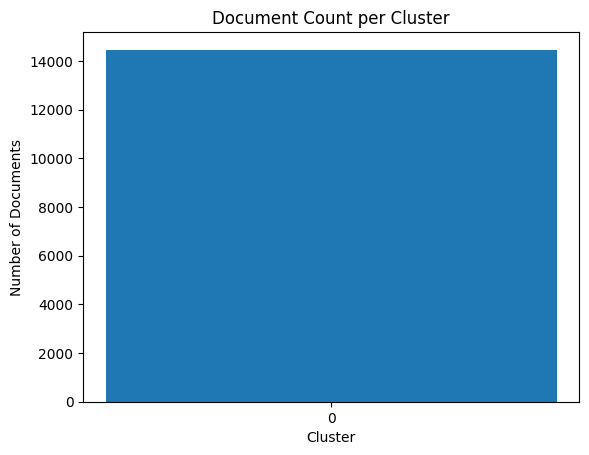

In [ ]:
display_bar_chart(labels_doc2vec)

### DBSCAN + SBERT

In [ ]:
clustering_dbscan(sbert_embeddings)

Number of data in each cluster
Outliers : 14467 data

Evaluation
There is either no cluster or one cluster, so silhouette score can't be calculated


array([-1, -1, -1, ..., -1, -1, -1])

Hyperparameter Tuning

In [ ]:
best_params_sbert = params_tuning(sbert_embeddings)

Parameter: Epsilon = 0.1 , Min Samples = 2
Clustering Result: [-1 -1 -1 ... -1 -1 -1]
Silhouette Score: There is either no cluster or one cluster, so silhouette score can't be calculated
Outliers : 14467 data
Parameter: Epsilon = 0.1 , Min Samples = 6
Clustering Result: [-1 -1 -1 ... -1 -1 -1]
Silhouette Score: There is either no cluster or one cluster, so silhouette score can't be calculated
Outliers : 14467 data
Parameter: Epsilon = 0.1 , Min Samples = 10
Clustering Result: [-1 -1 -1 ... -1 -1 -1]
Silhouette Score: There is either no cluster or one cluster, so silhouette score can't be calculated
Outliers : 14467 data
Parameter: Epsilon = 0.25 , Min Samples = 2
Clustering Result: [-1 -1 -1 ... -1 -1 -1]
Silhouette Score: There is either no cluster or one cluster, so silhouette score can't be calculated
Outliers : 14467 data
Parameter: Epsilon = 0.25 , Min Samples = 6
Clustering Result: [-1 -1 -1 ... -1 -1 -1]
Silhouette Score: There is either no cluster or one cluster, so silhouette 

Clustering with Best Parameters

In [ ]:
labels_sbert = clustering_dbscan(sbert_embeddings, best_params_sbert[0], best_params_sbert[1])

Number of data in each cluster
Outliers : 14463 data
Cluster 0: 2 data
Cluster 1: 2 data

Evaluation
Silhouette Score: -0.024245696


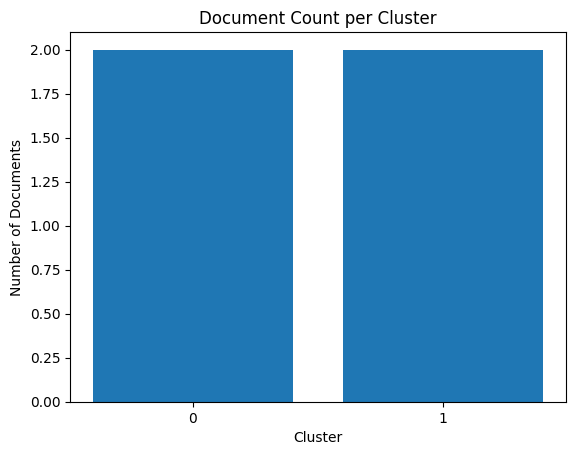

In [ ]:
display_bar_chart(labels_sbert)

## **Topic Finding TF-IDF**

In [ ]:
import gensim
from gensim import corpora

In [ ]:
dict1 = {"kalimat": cleaned_sentences}

clustered_sentences = {}

for i in range(len(labels_tfidf)):
  if labels_tfidf[i] != -1:
    kalimat = dict1["kalimat"][i]
    label = labels_tfidf[i]
    if label in clustered_sentences:
        clustered_sentences[label].append(kalimat)
    else:
        clustered_sentences[label] = [kalimat]

for label, sentences in clustered_sentences.items():
    print("Cluster", label)
    print(sentences)
    print("------------------")

Cluster 0
['', 'want thank guest todays instagram live session time great educative conversion', 'visors masks absolutely pointless covid', 'amazed officials try calm population covid risks get bashed hysterical citize', 'researchers delighted expanding recruitment overs sheffield', 'biden doesnt need obama even donald duck wouldnt need obama america', 'practice social distancing picking copy guardian local newsstand read', 'lasting covid effects global change mobility google searches compared normal level', 'covid monitoring list monterey case rate per k required days posi', 'main reason neet iitjee b postponed decide matters life students', 'putin says russias first covid vaccine receives approval health ministry daughter vaccinated russianvaccine covid', 'coronainfoch covid corona canada mandryk fighting covid requires', 'shows us one birmingham nursing home built chatterboxes let residents families visit', 'aiapget postponed jee neet wow dont know ruling govt much impact cc', 'jamm

In [ ]:
clustered_sentences

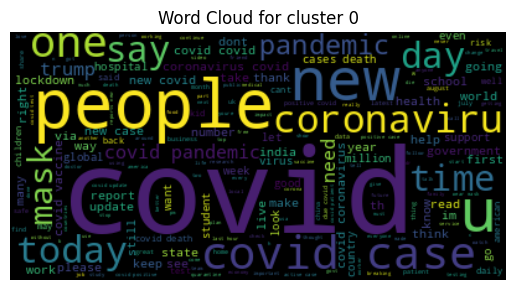

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for each key
for key, value in clustered_sentences.items():
    # Join the text data into a single string
    text = ' '.join(value)

    # Generate word cloud from the text data
    wordcloud = WordCloud().generate(text)

    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for cluster {key}')
    plt.axis('off')
    plt.show()

In [ ]:
# Preprocessing
splitted_cleaned_sentences = [sentence.lower().split() for sentence in cleaned_sentences]

# Membangun kamus kata
dictionary = corpora.Dictionary(splitted_cleaned_sentences)

In [ ]:
def find_topics(sentences, dictionary):
  # Preprocessing
  processed_sentences = [sentence.lower().split() for sentence in sentences]

  # Mengubah teks menjadi representasi vektor menggunakan Bag-of-Words
  corpus = [dictionary.doc2bow(sentence) for sentence in processed_sentences]

  # Membangun model LDA
  lda_model = gensim.models.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=1,
                                     passes=10)

  # Menampilkan topik yang dihasilkan
  formatted_topics = []
  topics = lda_model.print_topics(num_topics=1)
  for topic in topics:
    formatted_topic = [(word, f'{weight:.5f}') for word, weight in lda_model.show_topic(topic[0], topn=10)]
    formatted_topics.append((topic[0], formatted_topic))
    print(formatted_topic)

In [ ]:
for label, sentences in clustered_sentences.items():
  print('Cluster ', label)
  find_topics(sentences, dictionary)

Cluster  0
[('covid', '0.05252'), ('cases', '0.00796'), ('coronavirus', '0.00723'), ('new', '0.00672'), ('pandemic', '0.00427'), ('people', '0.00417'), ('deaths', '0.00345'), ('us', '0.00337'), ('one', '0.00263'), ('health', '0.00262')]


## **Topic Finding Doc2Vec**

In [ ]:
import gensim
from gensim import corpora

In [ ]:
dict1 = {"kalimat": cleaned_sentences}

clustered_sentences = {}

for i in range(len(labels_doc2vec)):
  if labels_doc2vec[i] != -1:
    kalimat = dict1["kalimat"][i]
    label = labels_doc2vec[i]
    if label in clustered_sentences:
        clustered_sentences[label].append(kalimat)
    else:
        clustered_sentences[label] = [kalimat]

for label, sentences in clustered_sentences.items():
    print("Cluster", label)
    print(sentences)
    print("------------------")

Cluster 0
['', 'want thank guest todays instagram live session time great educative conversion', 'visors masks absolutely pointless covid', 'tell favorite blood hands sending covid patients nursing homes', 'amazed officials try calm population covid risks get bashed hysterical citize', 'researchers delighted expanding recruitment overs sheffield', 'biden doesnt need obama even donald duck wouldnt need obama america', 'practice social distancing picking copy guardian local newsstand read', 'lasting covid effects global change mobility google searches compared normal level', 'bet god would totally bless waayyy millions gave away help people whove', 'told yall virus complete bullshit since day one cdc confirmed people hav', 'covid monitoring list monterey case rate per k required days posi', 'main reason neet iitjee b postponed decide matters life students', 'putin says russias first covid vaccine receives approval health ministry daughter vaccinated russianvaccine covid', 'coronainfoch c

In [ ]:
clustered_sentences

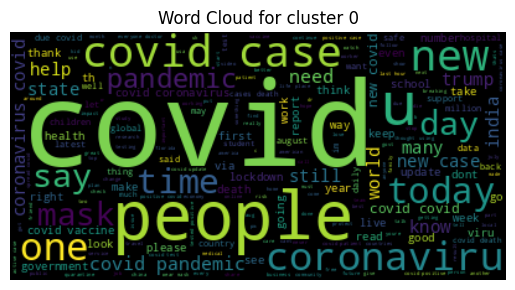

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for each key
for key, value in clustered_sentences.items():
    # Join the text data into a single string
    text = ' '.join(value)

    # Generate word cloud from the text data
    wordcloud = WordCloud().generate(text)

    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for cluster {key}')
    plt.axis('off')
    plt.show()

In [ ]:
# Preprocessing
splitted_cleaned_sentences = [sentence.lower().split() for sentence in cleaned_sentences]

# Membangun kamus kata
dictionary = corpora.Dictionary(splitted_cleaned_sentences)

In [ ]:
def find_topics(sentences, dictionary):
  # Preprocessing
  processed_sentences = [sentence.lower().split() for sentence in sentences]

  # Mengubah teks menjadi representasi vektor menggunakan Bag-of-Words
  corpus = [dictionary.doc2bow(sentence) for sentence in processed_sentences]

  # Membangun model LDA
  lda_model = gensim.models.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=1,
                                     passes=10)

  # Menampilkan topik yang dihasilkan
  formatted_topics = []
  topics = lda_model.print_topics(num_topics=1)
  for topic in topics:
    formatted_topic = [(word, f'{weight:.5f}') for word, weight in lda_model.show_topic(topic[0], topn=10)]
    formatted_topics.append((topic[0], formatted_topic))
    print(formatted_topic)

In [ ]:
for label, sentences in clustered_sentences.items():
  print('Cluster ', label)
  find_topics(sentences, dictionary)

Cluster  0
[('covid', '0.05508'), ('cases', '0.00823'), ('coronavirus', '0.00749'), ('new', '0.00631'), ('pandemic', '0.00483'), ('people', '0.00448'), ('deaths', '0.00342'), ('us', '0.00337'), ('health', '0.00272'), ('get', '0.00255')]


## **Topic Finding Sentence-BERT**

In [ ]:
import gensim
from gensim import corpora

In [ ]:
dict1 = {"kalimat": cleaned_sentences}

clustered_sentences = {}

for i in range(len(labels_sbert)):
  if labels_sbert[i] != -1:
    kalimat = dict1["kalimat"][i]
    label = labels_sbert[i]
    if label in clustered_sentences:
        clustered_sentences[label].append(kalimat)
    else:
        clustered_sentences[label] = [kalimat]

for label, sentences in clustered_sentences.items():
    print("Cluster", label)
    print(sentences)
    print("------------------")

Cluster 0
['afterschool programs adapt keep kids safe learning congress needs keep kids top mind', 'afterschool programs adapt keep kids safe learning congress needs keep kids top mind n']
------------------
Cluster 1
['singleday spike positive cases deaths india last hours total covid positive case', 'singleday spike positive cases deaths india last hours total covid positive cases']
------------------


In [ ]:
clustered_sentences

{0: ['afterschool programs adapt keep kids safe learning congress needs keep kids top mind',
  'afterschool programs adapt keep kids safe learning congress needs keep kids top mind n'],
 1: ['singleday spike positive cases deaths india last hours total covid positive case',
  'singleday spike positive cases deaths india last hours total covid positive cases']}

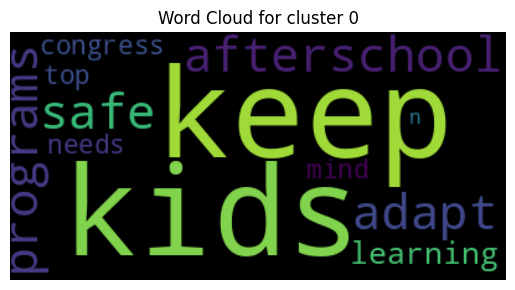

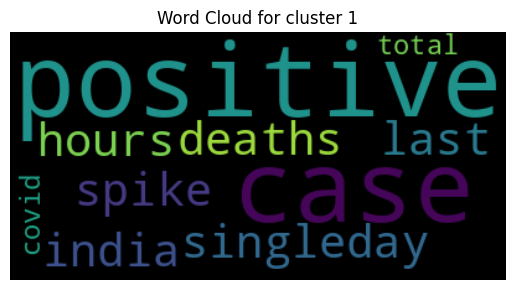

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for each key
for key, value in clustered_sentences.items():
    # Join the text data into a single string
    text = ' '.join(value)

    # Generate word cloud from the text data
    wordcloud = WordCloud().generate(text)

    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for cluster {key}')
    plt.axis('off')
    plt.show()

In [ ]:
# Preprocessing
splitted_cleaned_sentences = [sentence.lower().split() for sentence in cleaned_sentences]

# Membangun kamus kata
dictionary = corpora.Dictionary(splitted_cleaned_sentences)

In [ ]:
def find_topics(sentences, dictionary):
  # Preprocessing
  processed_sentences = [sentence.lower().split() for sentence in sentences]

  # Mengubah teks menjadi representasi vektor menggunakan Bag-of-Words
  corpus = [dictionary.doc2bow(sentence) for sentence in processed_sentences]

  # Membangun model LDA
  lda_model = gensim.models.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=1,
                                     passes=10)

  # Menampilkan topik yang dihasilkan
  formatted_topics = []
  topics = lda_model.print_topics(num_topics=1)
  for topic in topics:
    formatted_topic = [(word, f'{weight:.5f}') for word, weight in lda_model.show_topic(topic[0], topn=10)]
    formatted_topics.append((topic[0], formatted_topic))
    print(formatted_topic)

In [ ]:
for label, sentences in clustered_sentences.items():
  print('Cluster ', label)
  find_topics(sentences, dictionary)

Cluster  0
[('keep', '0.00021'), ('kids', '0.00021'), ('mind', '0.00012'), ('adapt', '0.00012'), ('learning', '0.00012'), ('afterschool', '0.00012'), ('congress', '0.00012'), ('safe', '0.00012'), ('programs', '0.00012'), ('needs', '0.00012')]
Cluster  1
[('positive', '0.00021'), ('cases', '0.00017'), ('deaths', '0.00012'), ('hours', '0.00012'), ('india', '0.00012'), ('singleday', '0.00012'), ('total', '0.00012'), ('spike', '0.00012'), ('last', '0.00012'), ('covid', '0.00012')]
